In [34]:
import pandas as pd
import numpy as np
import datetime
import platform
import re
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from IPython.display import display, Image

## 0. Start Chromedriver
- **`CHROME_VERSION`**: go to your chrome settings and check your version of chrome. If your version does not match the version shown below, download the correct version of the Chromedriver from [here](https://chromedriver.chromium.org/downloads) and append the version number to the end of its name. e.g. if you have Chrome version 80, you should rename `chromedriver.exe` to `chromedriver80.exe`
  - **`Options()`**: adding `headless` and `window-size` arguments allows us to use Chromedriver without a GUI.

In [35]:
CHROME_VERSION='79'  # change this to match Chrome version on host machine

options = Options()
options.add_argument('headless')
options.add_argument('window-size=1200x600')

global driver
if platform.system() == 'Windows':
    driver = webdriver.Chrome(f'./chromedriver/chromedriver{CHROME_VERSION}.exe', options=options)
else:
    driver = webdriver.Chrome(f'./chromedriver/chromedriver{CHROME_VERSION}', options=options)

---
## 1. Load last week's match odds

In [36]:
df = pd.read_csv('./data/super_rugby_oddsportal.csv')
df.head(10)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-03-06,Sunwolves,Brumbies,14,47,NaN,14.63,48.56,1.01,11
1,2020-03-06,Crusaders,Reds,24,20,NaN,1.04,42.71,10.76,11
2,2020-03-06,Waratahs,Chiefs,14,51,NaN,3.54,25.87,1.29,11
3,2020-03-07,Hurricanes,Blues,15,24,NaN,1.42,24.68,2.91,11
4,2020-03-07,Rebels,Lions,37,17,NaN,1.49,23.24,2.63,11
5,2020-03-07,Sharks,Jaguares,33,19,NaN,1.55,21.84,2.51,11
6,2020-03-07,Bulls,Highlanders,38,13,NaN,1.74,22.04,2.11,11
7,2020-02-28,Highlanders,Rebels,22,28,NaN,1.16,25.72,5.14,11
8,2020-02-28,Waratahs,Lions,29,17,NaN,1.58,22.19,2.42,11
9,2020-02-29,Hurricanes,Sunwolves,62,15,NaN,1.01,50.80,19.30,11


### Find matches that do not have scores

In [37]:
df['Date'] = df['Date'].apply(lambda x: pd.to_datetime(x, dayfirst=True))

In [38]:
last_week = df['Date'][0]

In [39]:
df[df['Date']>=last_week]

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-03-06,Sunwolves,Brumbies,14,47,NaN,14.63,48.56,1.01,11
1,2020-03-06,Crusaders,Reds,24,20,NaN,1.04,42.71,10.76,11
2,2020-03-06,Waratahs,Chiefs,14,51,NaN,3.54,25.87,1.29,11
3,2020-03-07,Hurricanes,Blues,15,24,NaN,1.42,24.68,2.91,11
4,2020-03-07,Rebels,Lions,37,17,NaN,1.49,23.24,2.63,11
5,2020-03-07,Sharks,Jaguares,33,19,NaN,1.55,21.84,2.51,11
6,2020-03-07,Bulls,Highlanders,38,13,NaN,1.74,22.04,2.11,11


In [40]:
driver.get( "https://www.oddsportal.com/rugby-union/world/super-rugby/results/")
driver.implicitly_wait(5)  # give page time to load all content

We can take a peek at what the Chromedriver sees using the `get_screenshot_as_png()` method on the driver object.

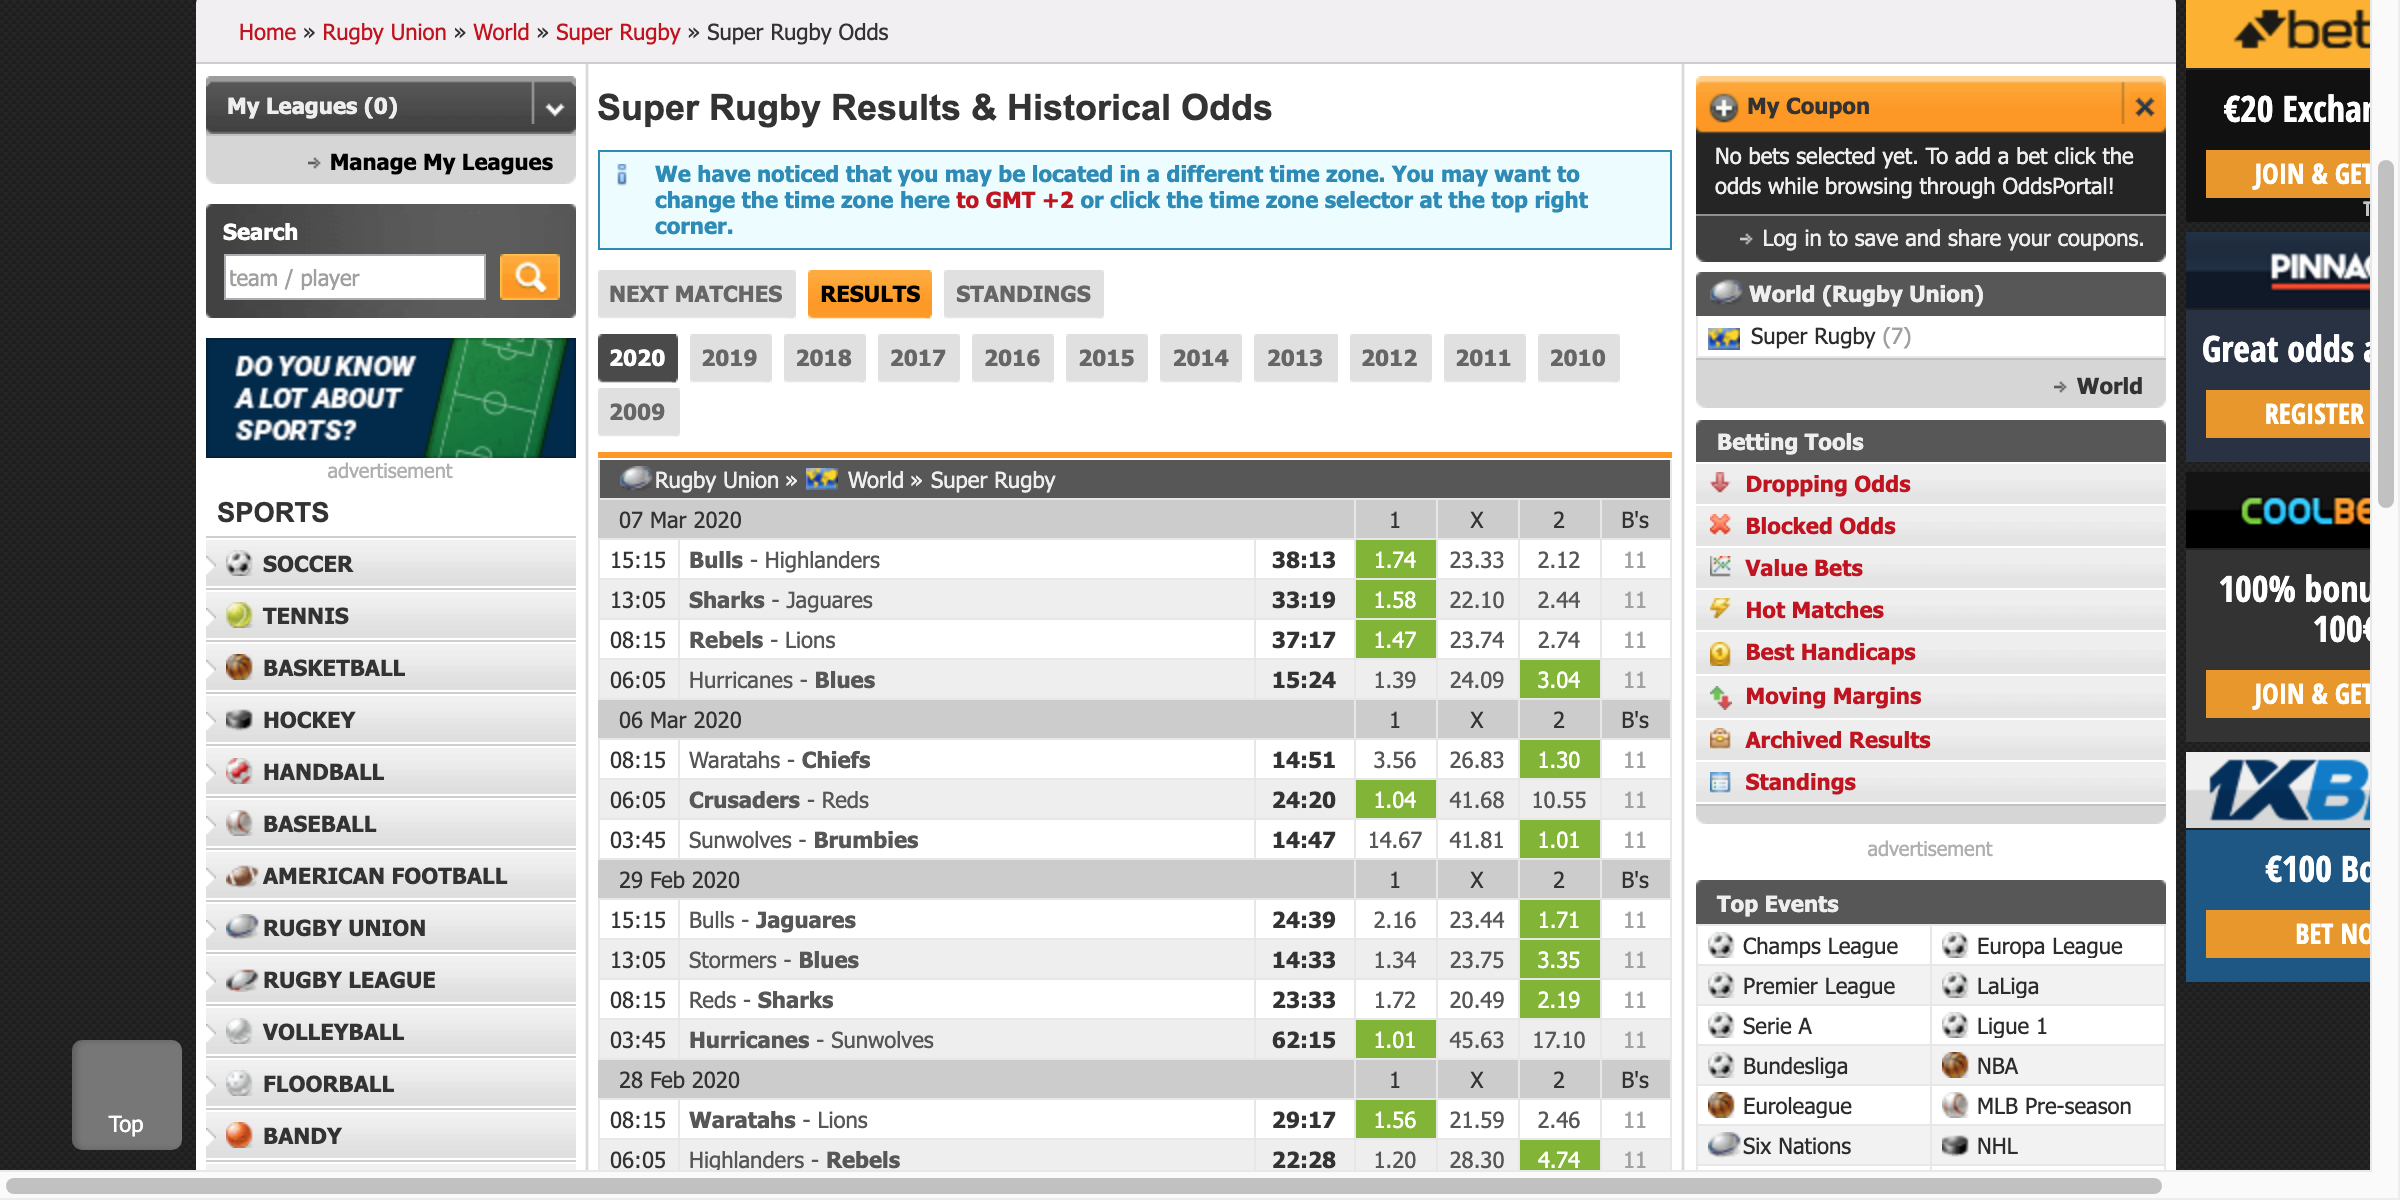

In [41]:
# scroll down a bit
driver.execute_script("window.scrollTo(0, 250)")

# show what driver sees
display(
    Image(
        driver.get_screenshot_as_png(),
        width=1200,
        height=800
    )
)

In [42]:
table = driver.find_element_by_xpath('//*[@id="tournamentTable"]')

In [43]:
table.find_elements_by_xpath('//*[@id="tournamentTable"]/tbody')

[<selenium.webdriver.remote.webelement.WebElement (session="24cf19d2218a2515f96aede555dc4bbc", element="ec81277a-86fa-4afc-b55b-ea3dca089c33")>]

In [44]:
table.text

"Rugby Union\n»\n World\n»\nSuper Rugby\n07 Mar 2020 1 X 2 B's\n15:15 Bulls - Highlanders 38:13\n1.74\n23.33\n2.12\n11\n13:05 Sharks - Jaguares 33:19\n1.58\n22.10\n2.44\n11\n08:15 Rebels - Lions 37:17\n1.47\n23.74\n2.74\n11\n06:05 Hurricanes - Blues 15:24\n1.39\n24.09\n3.04\n11\n06 Mar 2020 1 X 2 B's\n08:15 Waratahs - Chiefs 14:51\n3.56\n26.83\n1.30\n11\n06:05 Crusaders - Reds 24:20\n1.04\n41.68\n10.55\n11\n03:45 Sunwolves - Brumbies 14:47\n14.67\n41.81\n1.01\n11\n29 Feb 2020 1 X 2 B's\n15:15 Bulls - Jaguares 24:39\n2.16\n23.44\n1.71\n11\n13:05 Stormers - Blues 14:33\n1.34\n23.75\n3.35\n11\n08:15 Reds - Sharks 23:33\n1.72\n20.49\n2.19\n11\n03:45 Hurricanes - Sunwolves 62:15\n1.01\n45.63\n17.10\n11\n28 Feb 2020 1 X 2 B's\n08:15 Waratahs - Lions 29:17\n1.56\n21.59\n2.46\n11\n06:05 Highlanders - Rebels 22:28\n1.20\n28.30\n4.74\n11\n22 Feb 2020 1 X 2 B's\n15:15 Bulls - Blues 21:23\n1.63\n20.66\n2.34\n11\n13:05 Stormers - Jaguares 17:7\n1.33\n22.98\n3.38\n11\n08:15 Reds - Sunwolves 64:5\n1.

In [45]:
table_rows = table.text.split('\n')
# remove table header (first 5 lines)
table_rows = table_rows[5:]

# split list up by dates
date_idx = []
idx = 0
for row in table_rows:
    if "1 X 2 B's" in row:
        row_date = pd.to_datetime(row[:11].replace(' ','-'))
        date_idx.append(idx)
    idx += 1

In [46]:
# schema of dataframe
results = {
    'Date': [],
    'Home Score': [],
    'Away Score': []
}

# for each separate date
for i in range(len(date_idx)):
    
    # extract date
    date = table_rows[date_idx[i]]
    date = date.replace(" 1 X 2 B's", '')
    date = date.replace(' ', '-')
    
    # first match is the row after the date
    first_match = date_idx[i]+1
    
    fixtures = []
    
    if i < len(date_idx)-1:
        last_match = date_idx[i+1]
        fixtures = table_rows[first_match:last_match]
        
    else:
        fixtures = table_rows[first_match:]
        
    fixtures = np.array(fixtures).reshape(-1, 5)
    date_col = np.repeat([date], fixtures.shape[0])
    fixtures = np.hstack((date_col.reshape(-1, 1), fixtures))
    
    # add each row to dictionary
    for f in fixtures:
        
        home_score = (f[1].split()[-1].split(':')[0])
        away_score = (f[1].split()[-1].split(':')[1])
        
        results['Date'].append(pd.to_datetime(date))
        results['Home Score'].append(home_score)
        results['Away Score'].append(away_score)

# convert dictionary to dataframe
results = pd.DataFrame(results)
results = results[results['Date']>=last_week]
results = results.loc[:len(results)-1, ['Home Score', 'Away Score']]
results = results.iloc[::-1].reset_index(drop=True)
results

,Home Score,Away Score
0,14,47
1,24,20
2,14,51
3,15,24
4,37,17
5,33,19
6,38,13


In [47]:
df.loc[:len(results)-1:, ['Home Score', 'Away Score']] = results.loc[:len(results)-1, ['Home Score', 'Away Score']]

In [48]:
# check results are in
df.head(10)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-03-06,Sunwolves,Brumbies,14,47,NaN,14.63,48.56,1.01,11
1,2020-03-06,Crusaders,Reds,24,20,NaN,1.04,42.71,10.76,11
2,2020-03-06,Waratahs,Chiefs,14,51,NaN,3.54,25.87,1.29,11
3,2020-03-07,Hurricanes,Blues,15,24,NaN,1.42,24.68,2.91,11
4,2020-03-07,Rebels,Lions,37,17,NaN,1.49,23.24,2.63,11
5,2020-03-07,Sharks,Jaguares,33,19,NaN,1.55,21.84,2.51,11
6,2020-03-07,Bulls,Highlanders,38,13,NaN,1.74,22.04,2.11,11
7,2020-02-28,Highlanders,Rebels,22,28,NaN,1.16,25.72,5.14,11
8,2020-02-28,Waratahs,Lions,29,17,NaN,1.58,22.19,2.42,11
9,2020-02-29,Hurricanes,Sunwolves,62,15,NaN,1.01,50.80,19.30,11


In [49]:
df.to_csv('./data/super_rugby_oddsportal.csv', index=False)

---
## 2. Load upcoming Super Rugby match odds

In [50]:
driver.get( "https://www.oddsportal.com/rugby-union/world/super-rugby/")
driver.implicitly_wait(5)  # give page time to load all content

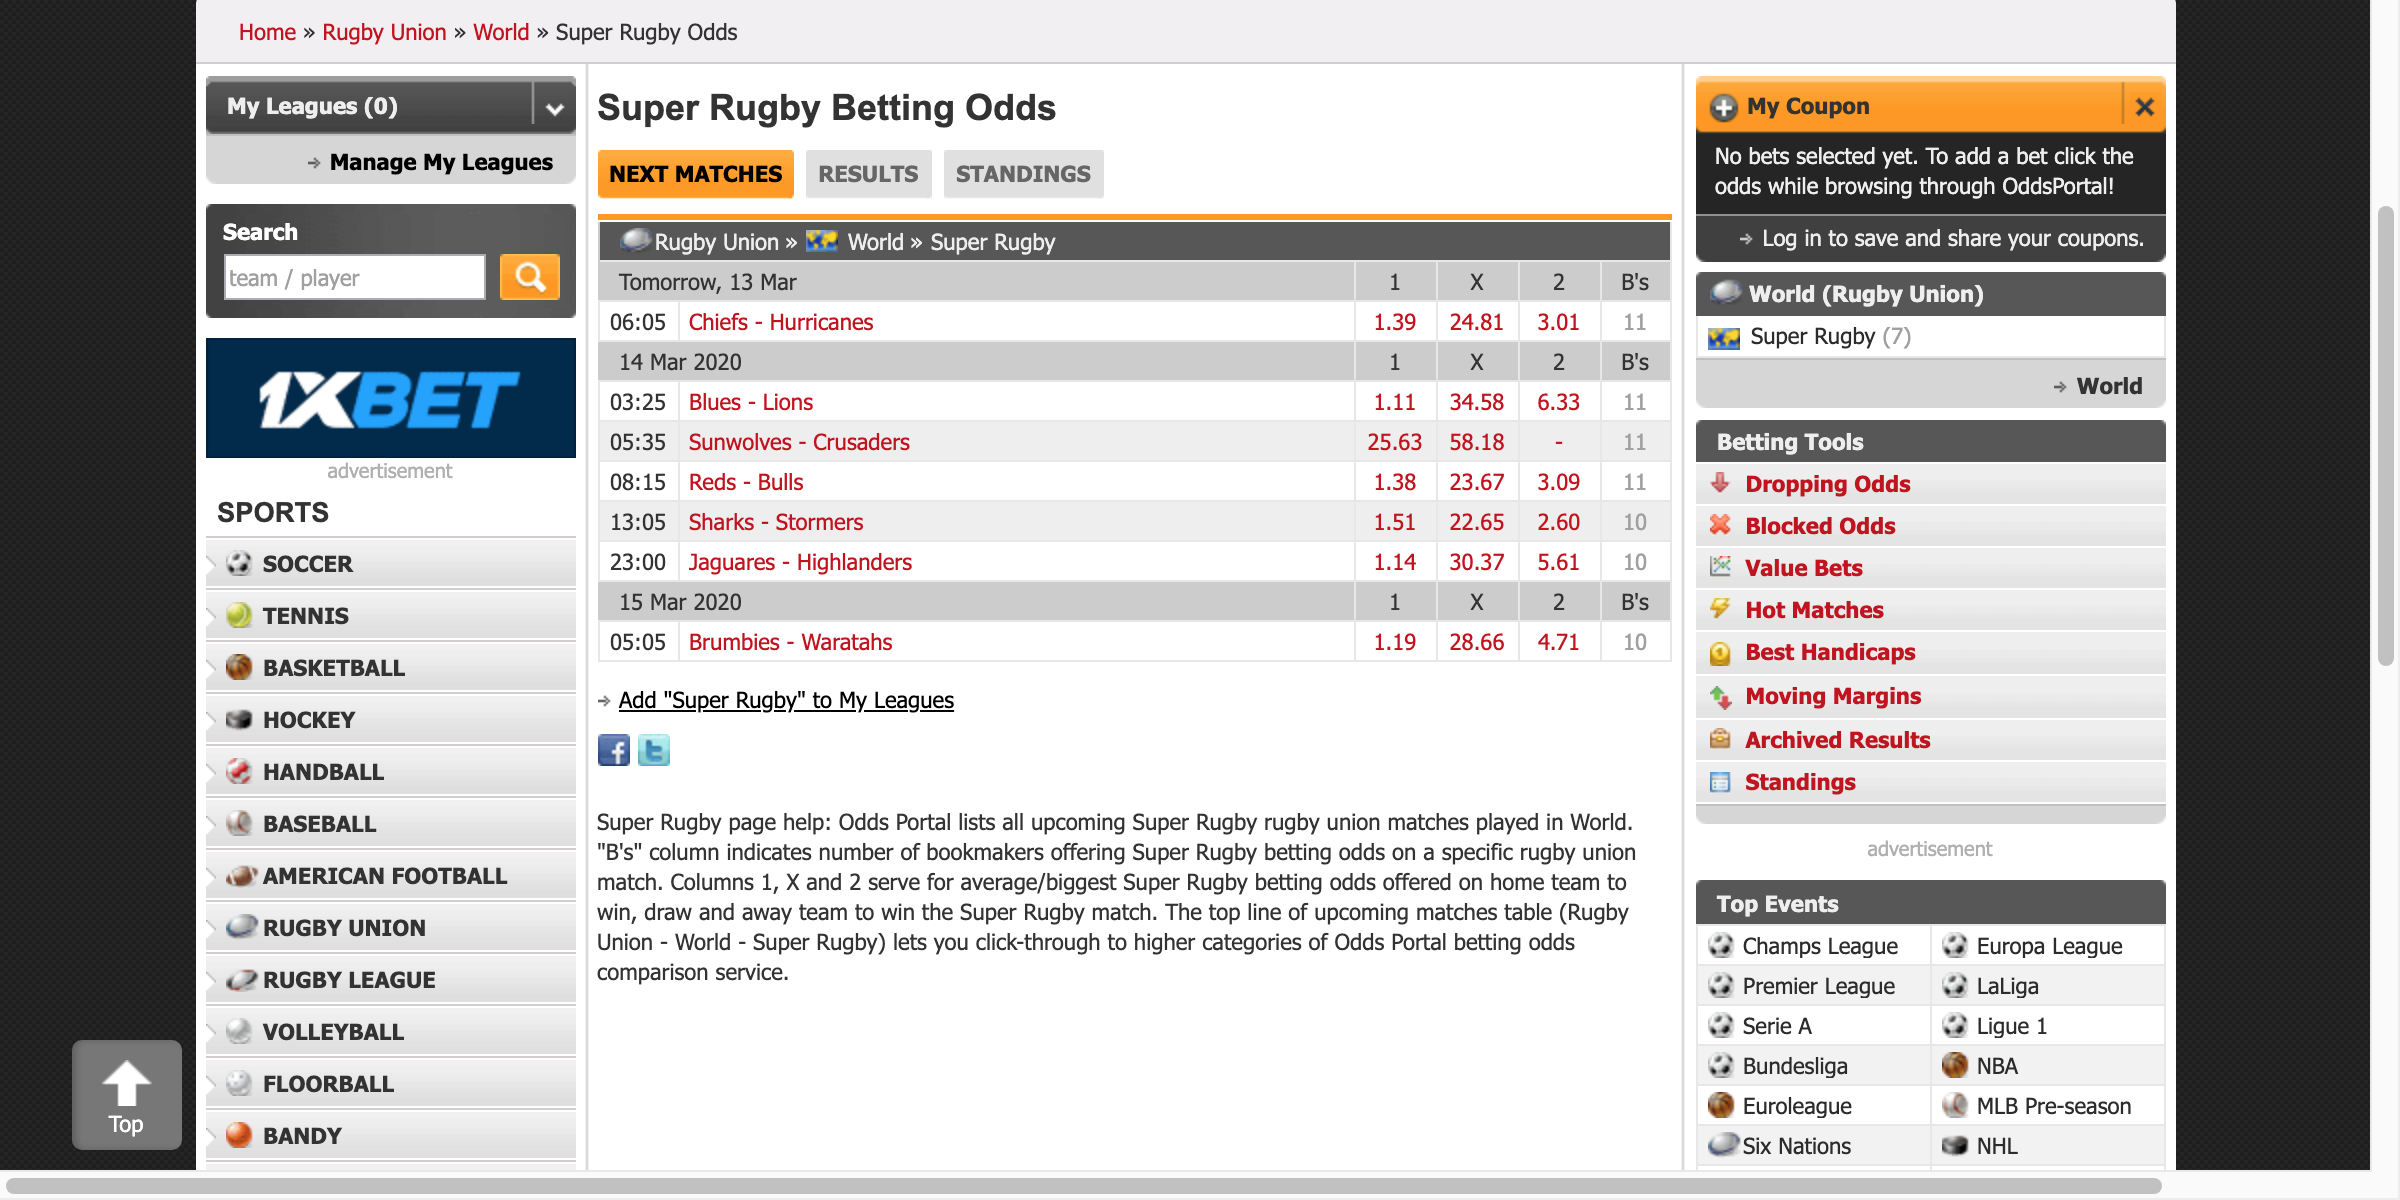

In [51]:
# scroll down a bit
driver.execute_script("window.scrollTo(0, 250)")

# show what driver sees
display(
    Image(
        driver.get_screenshot_as_png(),
        width=1200,
        height=800
    )
)

In [52]:
table = driver.find_element_by_xpath('//*[@id="tournamentTable"]')

In [53]:
table.text

"Rugby Union\n»\n World\n»\nSuper Rugby\nTomorrow, 13 Mar 1 X 2 B's\n06:05 Chiefs - Hurricanes\n1.39\n24.81\n3.01\n11\n14 Mar 2020 1 X 2 B's\n03:25 Blues - Lions\n1.11\n34.58\n6.33\n11\n05:35 Sunwolves - Crusaders\n25.63\n58.18\n-\n11\n08:15 Reds - Bulls\n1.38\n23.67\n3.09\n11\n13:05 Sharks - Stormers\n1.51\n22.65\n2.60\n10\n23:00 Jaguares - Highlanders\n1.14\n30.37\n5.61\n10\n15 Mar 2020 1 X 2 B's\n05:05 Brumbies - Waratahs\n1.19\n28.66\n4.71\n10"

In [54]:
table_rows = table.text.split('\n')
table_rows[:25]

['Rugby Union',
 '»',
 ' World',
 '»',
 'Super Rugby',
 "Tomorrow, 13 Mar 1 X 2 B's",
 '06:05 Chiefs - Hurricanes',
 '1.39',
 '24.81',
 '3.01',
 '11',
 "14 Mar 2020 1 X 2 B's",
 '03:25 Blues - Lions',
 '1.11',
 '34.58',
 '6.33',
 '11',
 '05:35 Sunwolves - Crusaders',
 '25.63',
 '58.18',
 '-',
 '11',
 '08:15 Reds - Bulls',
 '1.38',
 '23.67']

In [55]:
# remove table header (first 5 lines)
table_rows = table_rows[5:]

In [56]:
# split list up by dates
date_idx = []
idx = 0
for row in table_rows:
    if "1 X 2 B's" in row:
        print(row)
        date_idx.append(idx)
    idx += 1

Tomorrow, 13 Mar 1 X 2 B's
14 Mar 2020 1 X 2 B's
15 Mar 2020 1 X 2 B's


In [57]:
date_idx

[0, 6, 32]

In [58]:
# schema of dataframe
df = {
    'Date': [],
    'Home Team': [],
    'Away Team': [],
    'Home Score': [],
    'Away Score': [],
    'Play-off Game?': [],
    'Home Odds': [],
    'Draw Odds': [],
    'Away Odds': [],
    'Bookmakers Surveyed': []
}

# for each separate date
for i in range(len(date_idx)):
    
    # extract date
    date = table_rows[date_idx[i]]
    date = date.replace(" 1 X 2 B's", '')
    
    # remove unnecessary text
    if 'Tomorrow' in date or 'Today' in date:
        date = date[date.find(',')+2: ] + ' ' + str(datetime.datetime.now().year)
        
    date = date.replace(' ', '-')
    
    first_match = date_idx[i]+1
    
    fixtures = []
    
    if i < len(date_idx)-1:
        last_match = date_idx[i+1]
        fixtures = table_rows[first_match:last_match]
        
    else:
        fixtures = table_rows[first_match:]
        
    fixtures = np.array(fixtures).reshape(-1, 5)
    date_col = np.repeat([date], fixtures.shape[0])
    fixtures = np.hstack((date_col.reshape(-1, 1), fixtures))
    
    # add each row to dictionary
    for f in fixtures:
        df['Date'].append(pd.to_datetime(f[0]))
        df['Home Team'].append(f[1])
        df['Away Team'].append(f[1])
        df['Home Score'].append(0)
        df['Away Score'].append(0)
        df['Play-off Game?'].append('')
        df['Home Odds'].append(f[2])
        df['Draw Odds'].append(f[3])
        df['Away Odds'].append(f[4])
        df['Bookmakers Surveyed'].append(f[-1])

# convert dictionary to dataframe
df = pd.DataFrame(df)
df.head(7)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-03-13,06:05 Chiefs - Hurricanes,06:05 Chiefs - Hurricanes,0,0,,1.39,24.81,3.01,11
1,2020-03-14,03:25 Blues - Lions,03:25 Blues - Lions,0,0,,1.11,34.58,6.33,11
2,2020-03-14,05:35 Sunwolves - Crusaders,05:35 Sunwolves - Crusaders,0,0,,25.63,58.18,-,11
3,2020-03-14,08:15 Reds - Bulls,08:15 Reds - Bulls,0,0,,1.38,23.67,3.09,11
4,2020-03-14,13:05 Sharks - Stormers,13:05 Sharks - Stormers,0,0,,1.51,22.65,2.60,10
5,2020-03-14,23:00 Jaguares - Highlanders,23:00 Jaguares - Highlanders,0,0,,1.14,30.37,5.61,10
6,2020-03-15,05:05 Brumbies - Waratahs,05:05 Brumbies - Waratahs,0,0,,1.19,28.66,4.71,10


In [62]:
def get_home(s):
    '''find the text between the kick-off time and the dash'''
    return re.search(r'[0-2][0-9]:[0-6][0-9](.*?)-', s).group(1).strip()

def get_away(s):
    '''find the last word of text'''
    return s.split()[-1]

def convert(odds):
    try: 
        output = float(odds)
    
    except:
        nom = int(odds.split("/")[0])
        dem = int(odds.split("/")[1])
        output = (nom/dem)+1
    return output

# test functions' ability to extract team names
print(get_home('06:05 Blues - Chiefs'))
print(get_away('06:05 Blues - Chiefs'))

Blues
Chiefs


In [63]:
df['Home Team'] = df['Home Team'].apply(get_home)
df['Away Team'] = df['Away Team'].apply(get_away)

df['Home Odds'] = df['Home Odds'].apply(convert)
df['Away Odds'] = df['Away Odds'].apply(convert)
df['Draw Odds'] = df['Draw Odds'].apply(convert)

df.head(7)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-03-13,Chiefs,Hurricanes,0,0,,1.39,24.81,3.01,11
1,2020-03-14,Blues,Lions,0,0,,1.11,34.58,6.33,11
2,2020-03-14,Sunwolves,Crusaders,0,0,,25.63,58.18,1.00,11
3,2020-03-14,Reds,Bulls,0,0,,1.38,23.67,3.09,11
4,2020-03-14,Sharks,Stormers,0,0,,1.51,22.65,2.60,10
5,2020-03-14,Jaguares,Highlanders,0,0,,1.14,30.37,5.61,10
6,2020-03-15,Brumbies,Waratahs,0,0,,1.19,28.66,4.71,10


## Fetch Existing Dataset

In [64]:
# read in existing data
existing_dataset = pd.read_csv('./data/super_rugby_oddsportal.csv')

# replace NaNs with empty strings
existing_dataset.fillna('', inplace=True)

existing_dataset.head(10)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-03-06,Sunwolves,Brumbies,14,47,,14.63,48.56,1.01,11
1,2020-03-06,Crusaders,Reds,24,20,,1.04,42.71,10.76,11
2,2020-03-06,Waratahs,Chiefs,14,51,,3.54,25.87,1.29,11
3,2020-03-07,Hurricanes,Blues,15,24,,1.42,24.68,2.91,11
4,2020-03-07,Rebels,Lions,37,17,,1.49,23.24,2.63,11
5,2020-03-07,Sharks,Jaguares,33,19,,1.55,21.84,2.51,11
6,2020-03-07,Bulls,Highlanders,38,13,,1.74,22.04,2.11,11
7,2020-02-28,Highlanders,Rebels,22,28,,1.16,25.72,5.14,11
8,2020-02-28,Waratahs,Lions,29,17,,1.58,22.19,2.42,11
9,2020-02-29,Hurricanes,Sunwolves,62,15,,1.01,50.80,19.30,11


## Add Scraped Odds to Existing Dataset

In [65]:
# add new odds to existing
combined_df = pd.concat([df, existing_dataset], ignore_index=True)

In [66]:
combined_df.head(10)

,Date,Home Team,Away Team,Home Score,Away Score,Play-off Game?,Home Odds,Draw Odds,Away Odds,Bookmakers Surveyed
0,2020-03-13 00:00:00,Chiefs,Hurricanes,0,0,,1.39,24.81,3.01,11
1,2020-03-14 00:00:00,Blues,Lions,0,0,,1.11,34.58,6.33,11
2,2020-03-14 00:00:00,Sunwolves,Crusaders,0,0,,25.63,58.18,1.00,11
3,2020-03-14 00:00:00,Reds,Bulls,0,0,,1.38,23.67,3.09,11
4,2020-03-14 00:00:00,Sharks,Stormers,0,0,,1.51,22.65,2.60,10
5,2020-03-14 00:00:00,Jaguares,Highlanders,0,0,,1.14,30.37,5.61,10
6,2020-03-15 00:00:00,Brumbies,Waratahs,0,0,,1.19,28.66,4.71,10
7,2020-03-06,Sunwolves,Brumbies,14,47,,14.63,48.56,1.01,11
8,2020-03-06,Crusaders,Reds,24,20,,1.04,42.71,10.76,11
9,2020-03-06,Waratahs,Chiefs,14,51,,3.54,25.87,1.29,11


In [67]:
combined_df.shape

(1392, 10)

## Save Updated Dataset to CSV

In [68]:
combined_df.to_csv('./data/super_rugby_oddsportal.csv', index=False)